# Ordinary Least Squares

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(42)

In [4]:
# Fake Data
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x, x**2))
beta = np.array([1,0.1, 10])
e = np.random.normal(size=nsample)

In [5]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [6]:
# Model fit and Summary
res = sm.OLS(y, X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.437e+06
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.24e-245
Time:                        15:11:28   Log-Likelihood:                -131.47
No. Observations:                 100   AIC:                             268.9
Df Residuals:                      97   BIC:                             276.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9481      0.269      3.524      0.001       0.414       1.482
x1             0.0405      0.124      0.326      0.745      -0.206       0.287
x2            10.0073      0.012    831.696      0.000       9.983      10.031
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.431
Skew:                          -0.147   Prob(JB):                        0.806
Kurtosis:                       2.872   Cond. No.                         144.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
print("R2: ", res.rsquared )

R2:  0.9999910791623945


## OLS non-linear curve but linear in parameters

In [8]:
# Fake Data 2
nsample = 100
sig = 0.5
x = np.linspace(0,20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = np.array([0.5, 0.5, -0.02, 5.])
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample) # Adds noise

In [10]:
res_2 = sm.OLS(y, X).fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     483.6
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           8.70e-58
Time:                        15:15:28   Log-Likelihood:                -66.878
No. Observations:                 100   AIC:                             141.8
Df Residuals:                      96   BIC:                             152.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5151      0.018     28.252      0.000       0.479       0.551
x2             0.4970      0.070      7.053      0.000       0.357       0.637
x3            -0.0215      0.002    -13.399      0.000      -0.025      -0.018
const          4.9465      0.118     41.839      0.000       4.712       5.181
==============================================================================
Omnibus:                        2.638   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.323
Skew:                           0.373   Prob(JB):                        0.313
Kurtosis:                       3.028   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print("Parameters: ", res_2.params)
print("Std Errors: ", res_2.bse)
print("Pred Values: ", res_2.predict())
print("R Squared", res_2.rsquared)

Parameters:  [ 0.51514159  0.4969669  -0.02146912  4.94652663]
Std Errors:  [0.01823382 0.07046293 0.00160224 0.11822806]
Pred Values:  [ 4.40979871  4.65607931  4.89655171  5.12732507  5.34483179  5.54597257
  5.72824251  5.88983296  6.02970513  6.14763228  6.24420899  6.32082699
  6.37961847  6.42336945  6.45540642  6.47946104  6.49951834  6.51965471
  6.543872    6.57593482  6.6192174   6.67656634  6.75018483  6.84154306
  6.95131838  7.07936779  7.22473375  7.38568311  7.55977761  7.74397305
  7.93474311  8.12822281  8.32036563  8.50710821  8.68453551  8.84904013
  8.99746899  9.12725159  9.23650458  9.32410833  9.38975249  9.43394861
  9.45800932  9.46399498  9.45462981  9.43319116  9.40337616  9.36915136
  9.3345914   9.30371328  9.28031295  9.26781096  9.26911329  9.28649319
  9.32149869  9.37488965  9.44660685  9.5357744   9.64073539  9.75911921
  9.88793806 10.02370842 10.16259276 10.30055559 10.43352766 10.55757141
 10.66904116 10.76473139 10.84200709 10.89891098 10.9342431  

In [33]:
def plot_compare(res):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(x, y, 'o', label = 'data')
    ax.plot(x, y_true, 'b-', label="True")
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")
    ax.plot(x, iv_u, 'g--', label="Error")
    ax.plot(x, iv_1, 'g--')
    ax.legend(loc="best")

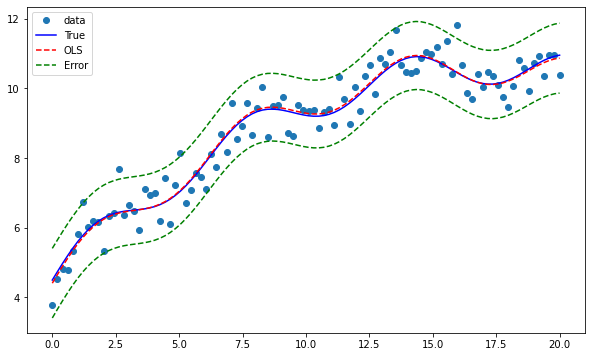

In [34]:
plot_compare(res_2)